# ASSIGNMENT - 6

# RACHIT AGGARWAL - M12506500

## Importing Libraries

In [17]:
import tensorflow as tf
import numpy as np 
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from PIL import Image
%matplotlib inline
import matplotlib.image as mpimg

In [2]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

## Uploading housing data

In [3]:
reset_graph()
housingData = fetch_california_housing()

In [4]:
housingData.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

## Normalizing the data

In [5]:
m, n = housingData.data.shape
scalar = StandardScaler()
scaledHousingData = scalar.fit_transform(housingData.data)
scaledHousingDataWithBias = np.c_[np.ones((m,1)), scaledHousingData]

## Saving the graph in a directory

In [6]:
reset_graph()
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

## Implementing Gradient Descent for 1000 epochs

In [7]:
epochs = 1000
learningRate = 0.01

X = tf.constant(scaledHousingDataWithBias, dtype=tf.float32, name='X')
y = tf.constant(housingData.target.reshape(-1, 1), dtype=tf.float32, name = 'y')
theta = tf.Variable(tf.random_uniform([n+1,1], -1, 1, seed=42), name='theta')
yPred = tf.matmul(X, theta, name='predictions')
error = yPred - y
mse = tf.reduce_mean(tf.square(error), name= 'mse')
gradient = 2/m*tf.matmul(tf.transpose(X), error)
trainingOp = tf.assign(theta, theta - learningRate*gradient)

## Writting the graph in the directory

In [8]:
graph = tf.get_default_graph()
file_writer = tf.summary.FileWriter(logdir, graph)
graph.get_operations()

[<tf.Operation 'X' type=Const>,
 <tf.Operation 'y' type=Const>,
 <tf.Operation 'random_uniform/shape' type=Const>,
 <tf.Operation 'random_uniform/min' type=Const>,
 <tf.Operation 'random_uniform/max' type=Const>,
 <tf.Operation 'random_uniform/RandomUniform' type=RandomUniform>,
 <tf.Operation 'random_uniform/sub' type=Sub>,
 <tf.Operation 'random_uniform/mul' type=Mul>,
 <tf.Operation 'random_uniform' type=Add>,
 <tf.Operation 'theta' type=VariableV2>,
 <tf.Operation 'theta/Assign' type=Assign>,
 <tf.Operation 'theta/read' type=Identity>,
 <tf.Operation 'predictions' type=MatMul>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'Square' type=Square>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'mse' type=Mean>,
 <tf.Operation 'transpose/Rank' type=Rank>,
 <tf.Operation 'transpose/sub/y' type=Const>,
 <tf.Operation 'transpose/sub' type=Sub>,
 <tf.Operation 'transpose/Range/start' type=Const>,
 <tf.Operation 'transpose/Range/delta' type=Const>,
 <tf.Operation 'transpose/Range' typ

## Initiating the Session and displaying MSE values after 100 values

In [9]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        if epoch%100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(trainingOp)
    bestTheta = theta.eval()    

Epoch 0 MSE = 9.161543
Epoch 100 MSE = 0.7145007
Epoch 200 MSE = 0.5667047
Epoch 300 MSE = 0.5555716
Epoch 400 MSE = 0.5488116
Epoch 500 MSE = 0.54363626
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.53650916
Epoch 800 MSE = 0.5340678
Epoch 900 MSE = 0.53214705


## Best value of the weight vector

In [10]:
bestTheta

array([[ 2.0685525 ],
       [ 0.8874027 ],
       [ 0.14401658],
       [-0.34770882],
       [ 0.36178368],
       [ 0.00393812],
       [-0.04269557],
       [-0.6614528 ],
       [-0.63752776]], dtype=float32)

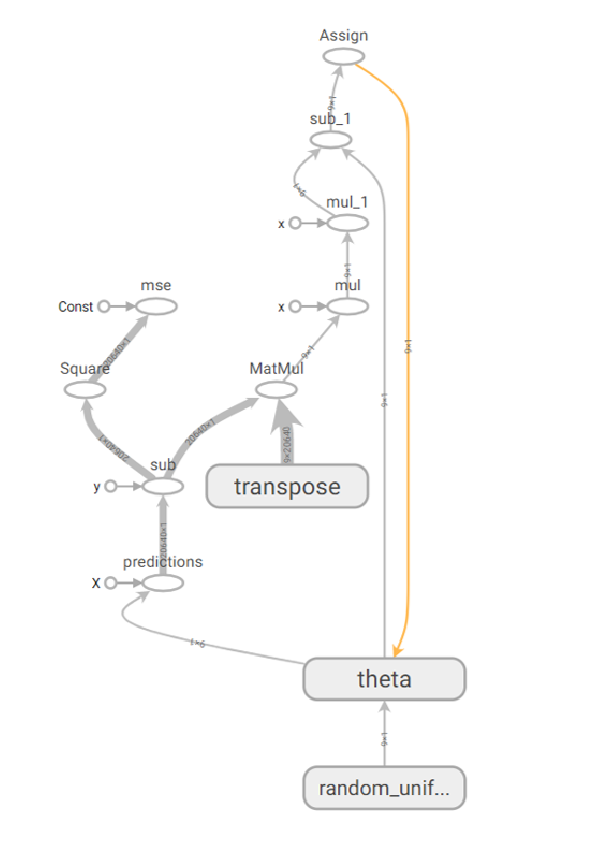

In [29]:
plt.figure(figsize=(10,20))
img = mpimg.imread('C:/Users/rachi/Desktop/' +'Graph1.png')
plt.imshow(img)
plt.axis("off")
plt.show()

## Number of nodes(including subnodes) = 14 
## random_uniform = 4 
## theta = 3
## Transpose =5 
## Total = 26

## Training using autodiff

In [11]:
reset_graph()

## Applying gradient descent 

In [12]:
epochs = 1000
learningRate = 0.01

X = tf.constant(scaledHousingDataWithBias, dtype=tf.float32, name='X')
y = tf.constant(housingData.target.reshape(-1, 1), dtype=tf.float32, name = 'y')
theta = tf.Variable(tf.random_uniform([n+1,1], -1, 1, seed=42), name='theta')
yPred = tf.matmul(X, theta, name='predictions')
error = yPred - y
mse = tf.reduce_mean(tf.square(error), name= 'mse')
gradient = tf.gradients(mse, [theta])[0]
trainingOp = tf.assign(theta, theta - learningRate*gradient)
init = tf.global_variables_initializer()

## Sving the graph in the directory

In [13]:
graph = tf.get_default_graph()
file_writer = tf.summary.FileWriter(logdir, graph)
graph.get_operations()

[<tf.Operation 'X' type=Const>,
 <tf.Operation 'y' type=Const>,
 <tf.Operation 'random_uniform/shape' type=Const>,
 <tf.Operation 'random_uniform/min' type=Const>,
 <tf.Operation 'random_uniform/max' type=Const>,
 <tf.Operation 'random_uniform/RandomUniform' type=RandomUniform>,
 <tf.Operation 'random_uniform/sub' type=Sub>,
 <tf.Operation 'random_uniform/mul' type=Mul>,
 <tf.Operation 'random_uniform' type=Add>,
 <tf.Operation 'theta' type=VariableV2>,
 <tf.Operation 'theta/Assign' type=Assign>,
 <tf.Operation 'theta/read' type=Identity>,
 <tf.Operation 'predictions' type=MatMul>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'Square' type=Square>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'mse' type=Mean>,
 <tf.Operation 'gradients/Shape' type=Const>,
 <tf.Operation 'gradients/grad_ys_0' type=Const>,
 <tf.Operation 'gradients/Fill' type=Fill>,
 <tf.Operation 'gradients/mse_grad/Reshape/shape' type=Const>,
 <tf.Operation 'gradients/mse_grad/Reshape' type=Reshape>,
 <tf.Opera

## Initiating the session

In [14]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        if epoch%100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(trainingOp)
    bestTheta = theta.eval()    

Epoch 0 MSE = 9.161543
Epoch 100 MSE = 0.7145006
Epoch 200 MSE = 0.56670463
Epoch 300 MSE = 0.5555716
Epoch 400 MSE = 0.5488117
Epoch 500 MSE = 0.5436362
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.53650916
Epoch 800 MSE = 0.5340678
Epoch 900 MSE = 0.53214717


## Best value for weight vector

In [15]:
bestTheta

array([[ 2.0685525 ],
       [ 0.8874027 ],
       [ 0.14401658],
       [-0.34770882],
       [ 0.36178368],
       [ 0.00393811],
       [-0.04269556],
       [-0.6614528 ],
       [-0.6375277 ]], dtype=float32)

## Plotting the graph

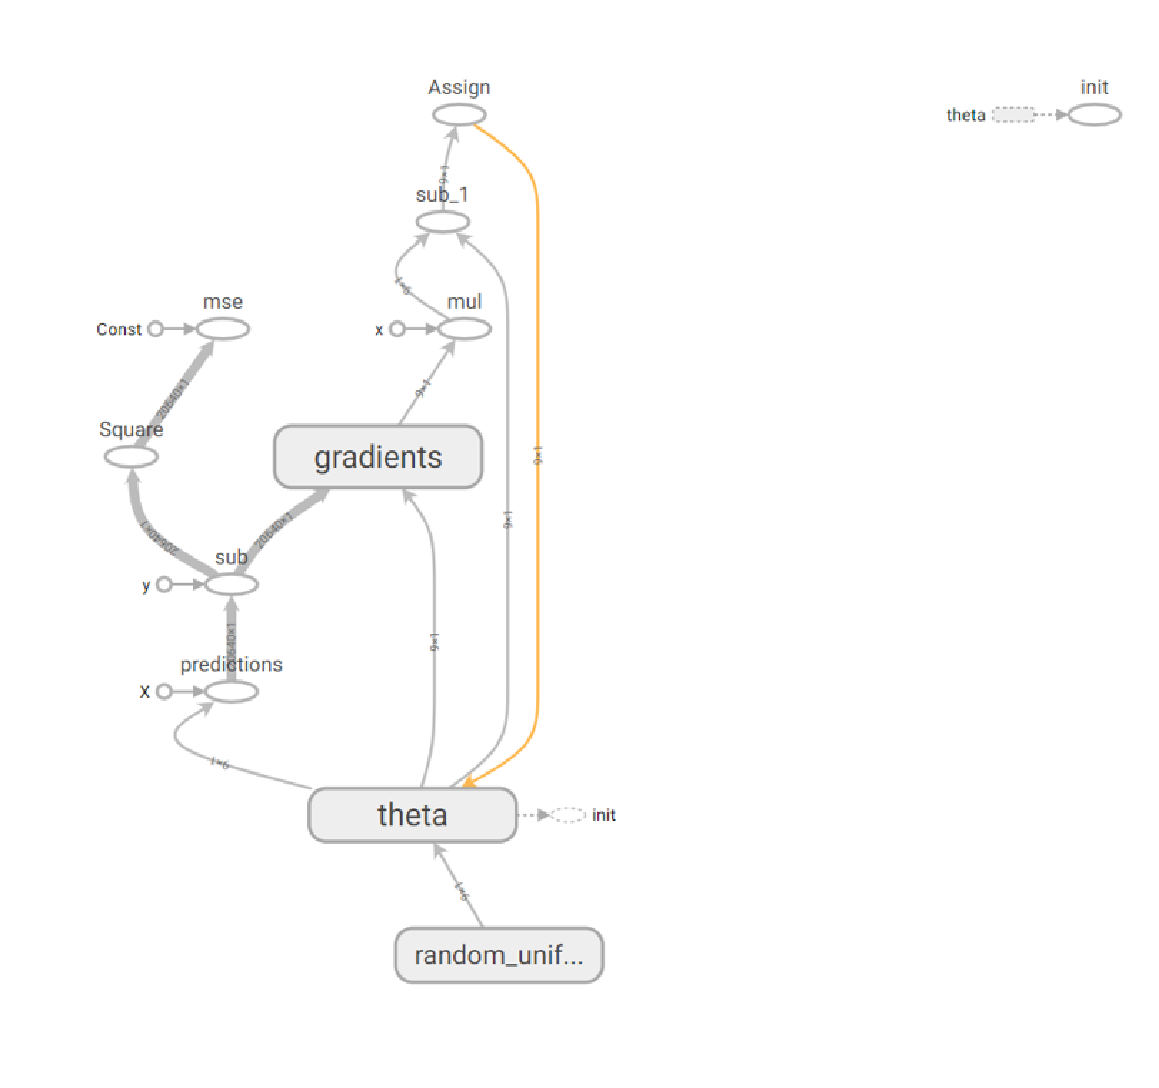

In [31]:
plt.figure(figsize=(20,20))
img = mpimg.imread('C:/Users/rachi/Desktop/' +'Graph2.png')
plt.imshow(img)
plt.axis("off")
plt.show()

## Number of nodes(including subnodes) = 11
## random_uniform = 4
## theta = 3
## gradient = 14 
## Total = 32

## Closing the directory

In [16]:
file_writer.close()

## Deductions:
### Number of nodes in graph built using autodiff is more than the number of nodes for graph without autodiff. Also the best values of weight vector are almost same, which means they same end results but the number of computations differ in both cases. Graph with autodiff uses more computations as compared to the graph without.

## Handmade graph with no autodiff

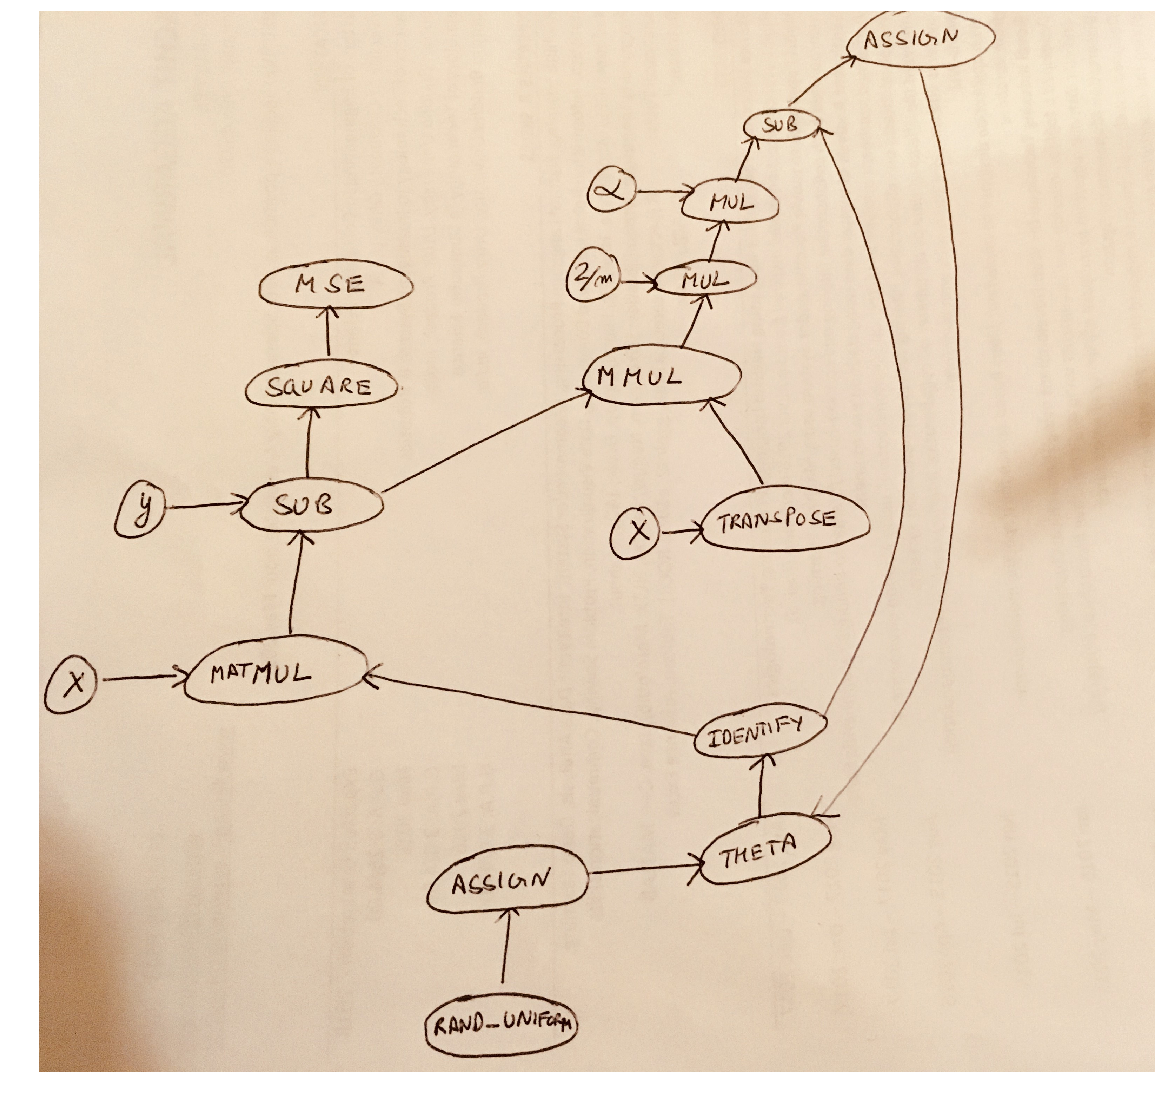

In [33]:
plt.figure(figsize=(20,20))
img = mpimg.imread('C:/Users/rachi/Desktop/' +'Handmade_graph.jpg')
plt.imshow(img)
plt.axis("off")
plt.show()